In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")
df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [2]:
# Count nulls per column
df.isna().sum()
# Percentage of nulls per column
(df.isna().mean() * 100).round(2)


date             0.0
state            0.0
district         0.0
pincode          0.0
demo_age_5_17    0.0
demo_age_17_     0.0
dtype: float64

In [3]:
# Fill numeric nulls with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# Fill categorical nulls with mode
cat_cols = df.select_dtypes(exclude=np.number).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [4]:
df.duplicated().sum()
# View duplicate rows
df[df.duplicated(keep=False)]

,date,state,district,pincode,demo_age_5_17,demo_age_17_
113325,18-10-2025,Karnataka,Belagavi,591313,0,1
113326,18-10-2025,Karnataka,Belagavi,591315,0,1
113327,18-10-2025,Karnataka,Belagavi,591316,0,1
113328,18-10-2025,Karnataka,Belgaum,590009,0,1
113329,18-10-2025,Karnataka,Belgaum,591101,1,6
...,...,...,...,...,...,...
407974,27-12-2025,Maharashtra,Jalgaon,425115,0,2
407975,27-12-2025,Maharashtra,Jalgaon,425307,1,13
407976,27-12-2025,Maharashtra,Jalgaon,425311,0,2
407977,27-12-2025,Maharashtra,Jalgaon,425507,0,2


In [5]:
for col in df.columns:
    print(col, "→", df[col].duplicated().sum())
#duplicate columnwise

date → 499905
state → 499942
district → 499044
pincode → 480393
demo_age_5_17 → 499464
demo_age_17_ → 497862


In [6]:
import pandas as pd

# Load dataset (FIX THE PATH HERE)
df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv", low_memory=False)

# Capitalize STATE
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.replace('&', 'and')
    .str.title()
)

# Capitalize DISTRICT
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

# Normalize state names
state_map = {
    'Orissa': 'Odisha',
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West Bengli': 'West Bengal',
    'Chhatisgarh': 'Chhattisgarh',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Pondicherry': 'Puducherry'
}

df['state'] = df['state'].replace(state_map)

# Remove invalid states
df = df[~df['state'].isin(['Darbhanga', 'Puttenahalli'])]

# Verify
print("Rows:", len(df))
print("Unique states:", df['state'].nunique())
print(sorted(df['state'].unique()))

Rows: 499997
Unique states: 36
['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [7]:
#aggregate population by date + district
df = df.groupby(
    ['date', 'state', 'district'],
    as_index=False
).sum(numeric_only=True)
#aggregate repeated values
#Clean basic formatting


In [8]:
#date aggregation:
print(df[['date']].head())
df['date'] = pd.to_datetime(
    df['date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)
df['date'].isna().sum()
df = df.dropna(subset=['date'])
df['month'] = df['date'].dt.to_period('M')
#monthly aggregation
monthly_df = (
    df.groupby(['month', 'district'], as_index=False)
      .sum(numeric_only=True)
)

print("\nMonthly aggregated data (after capitalization):")
print(monthly_df.head())

         date
0  01-03-2025
1  01-03-2025
2  01-03-2025
3  01-03-2025
4  01-03-2025

Monthly aggregated data (after capitalization):
     month    district   pincode  demo_age_5_17  demo_age_17_
0  2025-03    Adilabad   9075517            596          3610
1  2025-03  Agar Malwa    930890             78           710
2  2025-03        Agra   1413333            581          5808
3  2025-03  Ahmadnagar   8732550            575         12748
4  2025-03   Ahmedabad  11827279           3765         23688


In [9]:
#District name UNIFORMITY
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
)
district_mapping = {
    # Gujarat
    "Ahmadabad": "Ahmedabad",

    # Maharashtra
    "Ahmadnagar": "Ahmednagar",
    "Ahmed Nagar": "Ahmednagar",
    "Raebareli": "Rae Bareli",

    # Karnataka
    "Tumkur": "Tumakuru",
    "Belgaum": "Belagavi",
    "Bellary": "Ballari",
    "Bijapur": "Vijayapura",
    "Gulbarga": "Kalaburagi",

    # Tamil Nadu
    "Tuticorin": "Thoothukudi",
    "Villupuram": "Viluppuram",

    # Telangana / AP
    "Cuddapah": "Ysr Kadapa",
    "Mahabub Nagar": "Mahabubnagar",
    "Mahbubnagar": "Mahabubnagar",

    # West Bengal
    "East Midnapore": "Purba Medinipur",
    "West Midnapore": "Paschim Medinipur",
    "Burdwan": "Purba Bardhaman",

    # UP
    "Faizabad": "Ayodhya",
    "Allahabad": "Prayagraj",
    "Jyotiba Phule Nagar": "Amroha",

    # Haryana
    "Yamuna Nagar": "Yamunanagar",
}
print("Rows:", len(df))
print("Unique district:", df['district'].nunique())
print(sorted(df['district'].unique()))

Rows: 59814
Unique district: 934
['adilabad', 'agar malwa', 'agra', 'ahilyanagar', 'ahmadabad', 'ahmadnagar', 'ahmed nagar', 'ahmedabad', 'aizawl', 'ajmer', 'akola', 'alappuzha', 'aligarh', 'alipurduar', 'alirajpur', 'allahabad', 'alluri sitharama raju', 'almora', 'alwar', 'ambala', 'ambedkar nagar', 'amethi', 'amravati', 'amreli', 'amritsar', 'amroha', 'anakapalli', 'anand', 'anantapur', 'ananthapur', 'ananthapuramu', 'anantnag', 'andamans', 'angul', 'anjaw', 'annamayya', 'anugul', 'anuppur', 'araria', 'ariyalur', 'arvalli', 'arwal', 'ashok nagar', 'auraiya', 'aurangabad', 'aurangabad(bh)', 'ayodhya', 'azamgarh', 'badgam', 'bagalkot', 'bagalkot *', 'bageshwar', 'baghpat', 'baghpat *', 'bagpat', 'bahraich', 'bajali', 'baksa', 'balaghat', 'balangir', 'baleshwar', 'baleswar', 'balianta', 'ballari', 'ballia', 'bally jagachha', 'balod', 'baloda bazar', 'balotra', 'balrampur', 'banas kantha', 'banaskantha', 'banda', 'bandipore', 'bangalore', 'bangalore rural', 'banka', 'bankura', 'banswara'

In [10]:
#Normalization of numeric columns
#Min-Max Normalization (0 → 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())

    pincode  demo_age_5_17  demo_age_17_
0  0.010375       0.002154      0.005848
1  0.047691       0.021327      0.021211
2  0.050401       0.047178      0.055399
3  0.067702       0.030806      0.031715
4  0.124714       0.063550      0.150805


In [11]:
from scipy.stats import zscore

# Remove invalid states BEFORE normalization
df = df[~df['state'].isin(['Darbhanga', 'Puttenahalli'])]

# Identify numeric columns
num_cols = df.select_dtypes(include='number').columns

# Apply Z-score normalization safely
df[num_cols] = df[num_cols].apply(lambda x: zscore(x, nan_policy='omit'))

# Verify output
print(df[num_cols].head())

    pincode  demo_age_5_17  demo_age_17_
0 -0.663135      -0.129247     -0.014569
1 -0.252048       0.690047      0.536830
2 -0.222202       1.794713      1.763902
3 -0.031601       1.095091      0.913828
4  0.596455       2.494334      5.188216


In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numeric columns:")
print(num_cols)


Numeric columns:
['pincode', 'demo_age_5_17', 'demo_age_17_']


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_df = df.copy()
norm_df[num_cols] = scaler.fit_transform(norm_df[num_cols])

print("Normalized dataframe created.")


Normalized dataframe created.


In [15]:
comparison = pd.concat(
    [
        df[num_cols].head(),
        norm_df[num_cols].head()
    ],
    axis=1,
    keys=['Original', 'Normalized']
)

print("Before vs After Normalization:")
print(comparison.to_string())


Before vs After Normalization:
   Original                            Normalized                           
    pincode demo_age_5_17 demo_age_17_    pincode demo_age_5_17 demo_age_17_
0 -0.663135     -0.129247    -0.014569   0.010375      0.002154     0.005848
1 -0.252048      0.690047     0.536830   0.047691      0.021327     0.021211
2 -0.222202      1.794713     1.763902   0.050401      0.047178     0.055399
3 -0.031601      1.095091     0.913828   0.067702      0.030806     0.031715
4  0.596455      2.494334     5.188216   0.124714      0.063550     0.150805


In [16]:
#Outlier IDENTIFICATION
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) |
            (df[num_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()

pincode          4693
demo_age_5_17    5268
demo_age_17_     5862
dtype: int64

In [17]:
#Remove OUTLIERS
df = df[~(
    (df[num_cols] < (Q1 - 1.5 * IQR)) |
    (df[num_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

In [18]:
#Identify population columns (and PRINT them)
exclude_cols = {'pincode', 'year'}

population_cols = [
    col for col in monthly_df.select_dtypes(include='number').columns
    if col not in exclude_cols
]
monthly_df['total_population'] = monthly_df[population_cols].sum(axis=1)

print("\nTotal population (after regrouping):")
print(monthly_df[['month', 'district', 'total_population']].head())

#Create total_population and DISPLAY result
monthly_df = monthly_df.sort_values(['district', 'month'])

monthly_df['pop_change'] = (
    monthly_df
    .groupby('district')['total_population']
    .diff()
)

print("\nPopulation change :")
print(
    monthly_df[['month', 'district', 'total_population', 'pop_change']]
    .head(10)
)


#Sort for time-series calculation
monthly_df = monthly_df.sort_values(['district', 'month'])

print("\nSorted data (district-wise, first 6 rows):")
print(monthly_df[['month', 'district', 'total_population']].head(6))



Total population (after regrouping):
     month    district  total_population
0  2025-03    Adilabad              4206
1  2025-03  Agar Malwa               788
2  2025-03        Agra              6389
3  2025-03  Ahmadnagar             13323
4  2025-03   Ahmedabad             27453

Population change :
        month    district  total_population  pop_change
0     2025-03    Adilabad              4206         NaN
749   2025-04    Adilabad              1339     -2867.0
1413  2025-07    Adilabad              1733       394.0
1665  2025-09    Adilabad              4610      2877.0
2584  2025-10    Adilabad              2324     -2286.0
3485  2025-11    Adilabad              3421      1097.0
4407  2025-12    Adilabad              2519      -902.0
1     2025-03  Agar Malwa               788         NaN
966   2025-05  Agar Malwa               709       -79.0
1201  2025-06  Agar Malwa               312      -397.0

Sorted data (district-wise, first 6 rows):
        month  district  total_popu

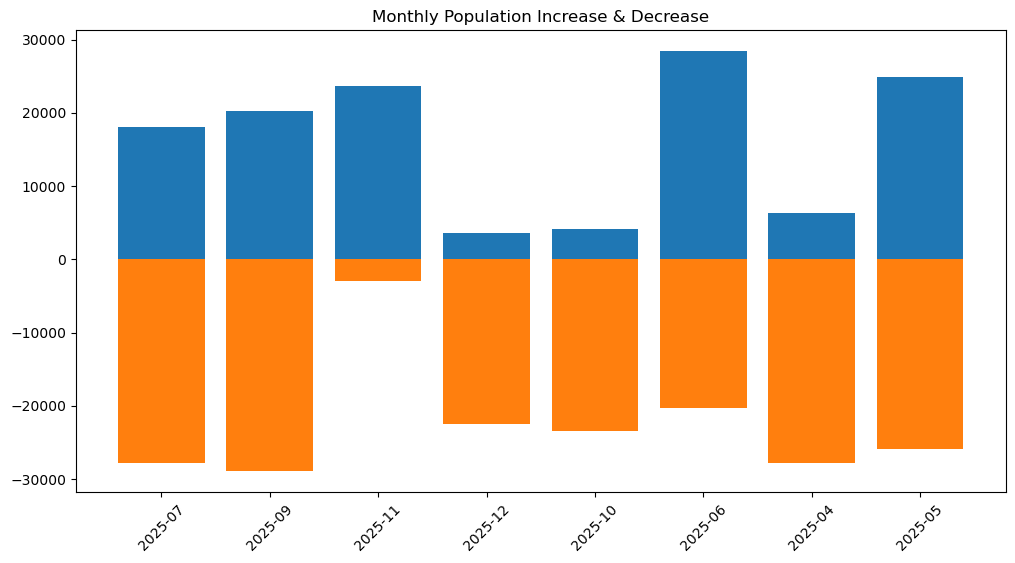

In [19]:
import matplotlib.pyplot as plt
inc = monthly_df[monthly_df['pop_change'] > 0]
dec = monthly_df[monthly_df['pop_change'] < 0]

plt.figure(figsize=(12,6))
plt.bar(inc['month'].astype(str), inc['pop_change'])
plt.bar(dec['month'].astype(str), dec['pop_change'])
plt.xticks(rotation=45)
plt.title("Monthly Population Increase & Decrease")
plt.show()


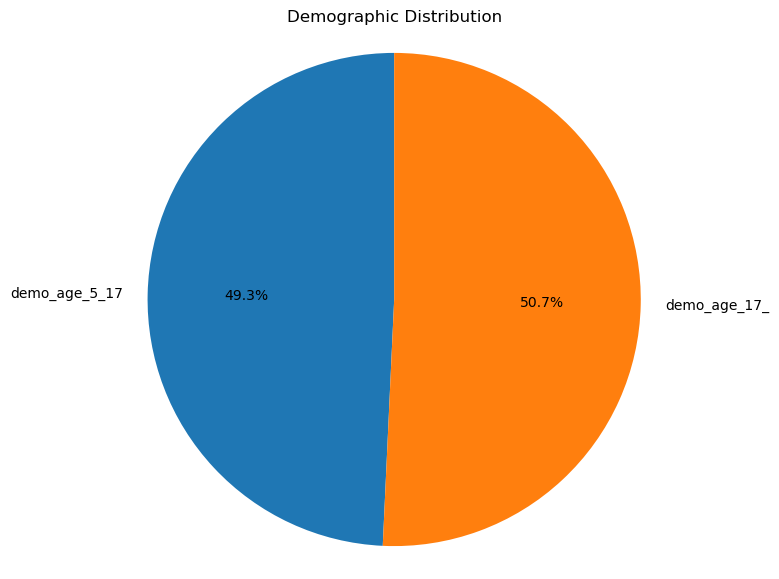

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Identify demographic numeric columns ----
exclude_cols = {
    'pincode', 'year', 'total_population', 'pop_change'
}

demo_cols = [
    col for col in df.select_dtypes(include=np.number).columns
    if col not in exclude_cols
]

# ---- Aggregate demographic values ----
demo_distribution = df[demo_cols].sum()

# ---- FIX: make values usable for pie chart ----
demo_distribution = demo_distribution.abs()   # remove negative issue
demo_distribution = demo_distribution[demo_distribution > 0]

# ---- SAFETY CHECK ----
if demo_distribution.sum() == 0:
    raise ValueError("All demographic values are zero after aggregation. Use raw (non-normalized) data.")

# ---- Plot pie chart ----
plt.figure(figsize=(7,7))
plt.pie(
    demo_distribution.values,
    labels=demo_distribution.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Demographic Distribution")
plt.axis('equal')
plt.show()

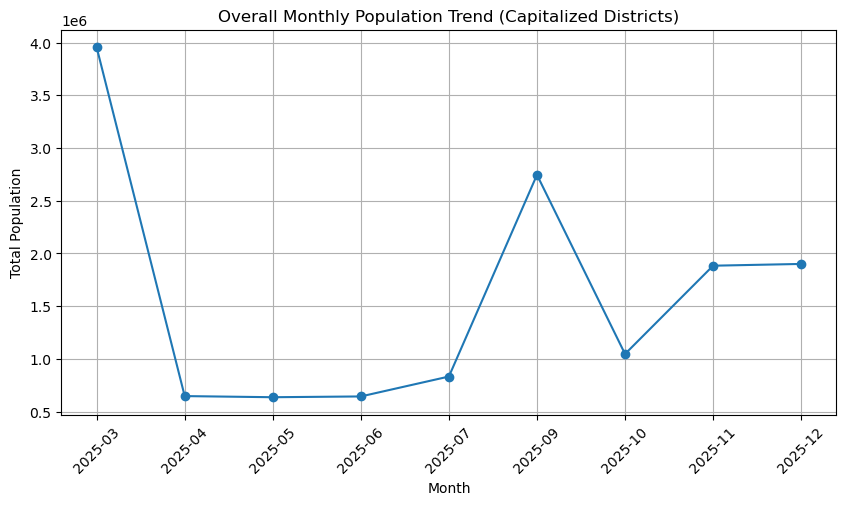

In [21]:
#Monthly Population Growth / Decline (Overall Trend)
overall_trend = monthly_df.groupby('month')['total_population'].sum()

plt.figure(figsize=(10,5))
plt.plot(overall_trend.index.astype(str), overall_trend.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Population")
plt.title("Overall Monthly Population Trend (Capitalized Districts)")
plt.grid(True)
plt.show()

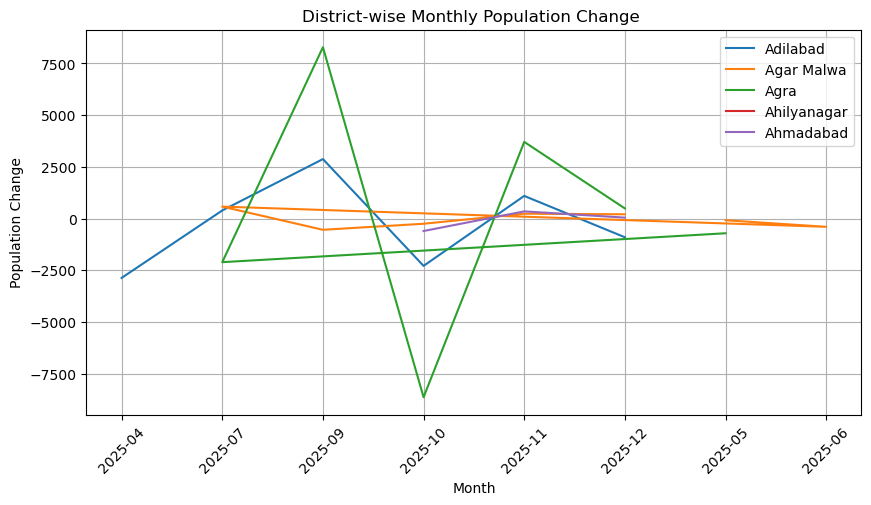

In [22]:
#District-wise Monthly Population Change
plt.figure(figsize=(10,5))

for district in monthly_df['district'].unique()[:5]:
    d = monthly_df[monthly_df['district'] == district]
    plt.plot(d['month'].astype(str), d['pop_change'], label=district)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Population Change")
plt.title("District-wise Monthly Population Change ")
plt.legend()
plt.grid(True)
plt.show()

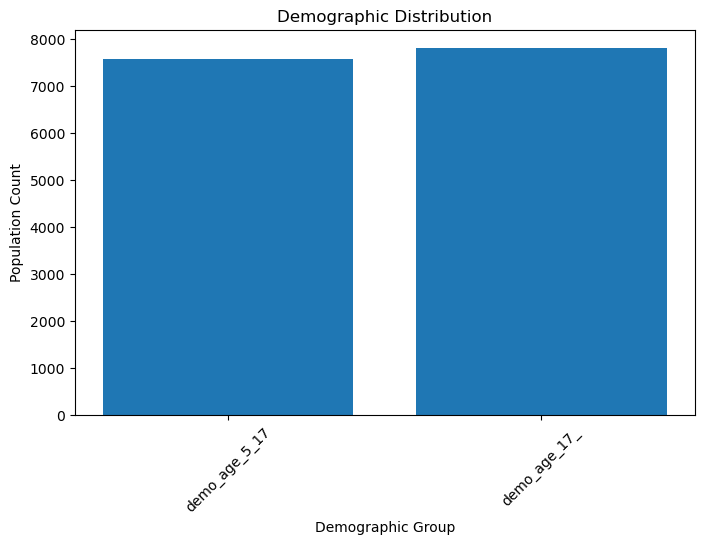

In [23]:
#Demographic Distribution (Bar Chart
import numpy as np

exclude_cols = {'pincode', 'year', 'total_population', 'pop_change'}
demo_cols = [
    col for col in df.select_dtypes(include=np.number).columns
    if col not in exclude_cols
]

demo_distribution = df[demo_cols].sum().abs()

plt.figure(figsize=(8,5))
plt.bar(demo_distribution.index, demo_distribution.values)
plt.xticks(rotation=45)
plt.xlabel("Demographic Group")
plt.ylabel("Population Count")
plt.title("Demographic Distribution")
plt.show()


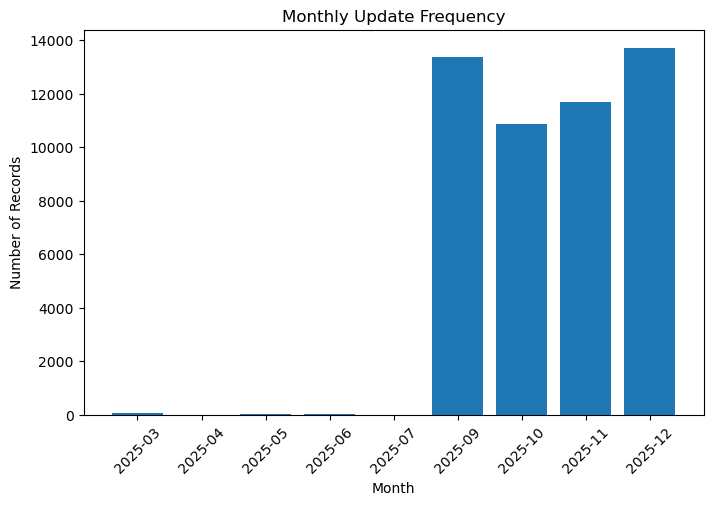

In [24]:
#Seasonal Pattern Detection (Monthly Update Frequency)
monthly_frequency = df.groupby('month').size()

plt.figure(figsize=(8,5))
plt.bar(monthly_frequency.index.astype(str), monthly_frequency.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.title("Monthly Update Frequency")
plt.show()

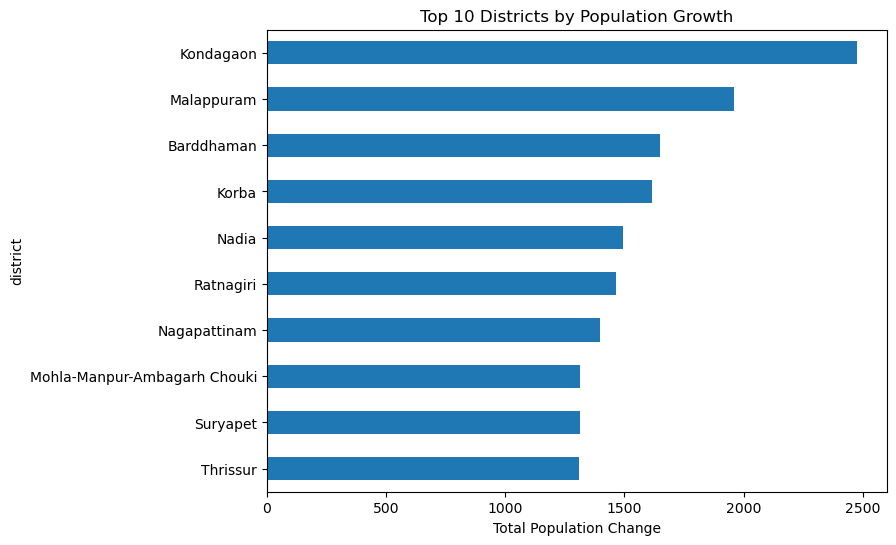

In [25]:
#Growth Inequality Across Districts
district_growth = monthly_df.groupby('district')['pop_change'].sum().sort_values()

plt.figure(figsize=(8,6))
district_growth.tail(10).plot(kind='barh')
plt.xlabel("Total Population Change")
plt.title("Top 10 Districts by Population Growth")
plt.show()

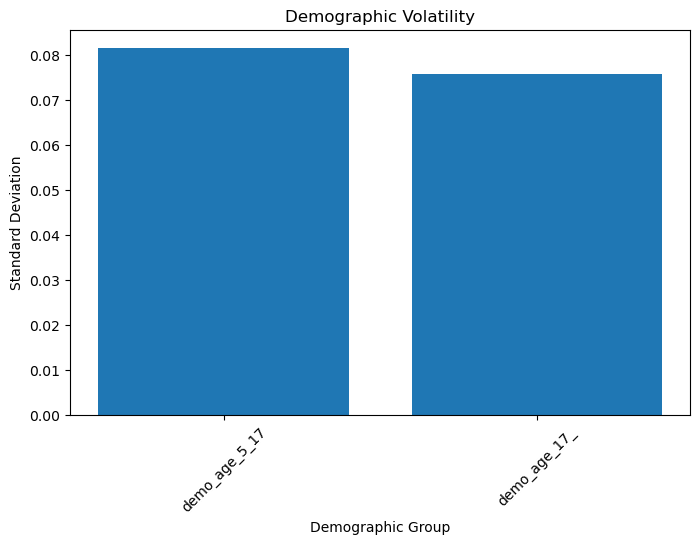

In [26]:
#Demographic Volatility (Which group changes most)
demo_volatility = df[demo_cols].std()

plt.figure(figsize=(8,5))
plt.bar(demo_volatility.index, demo_volatility.values)
plt.xticks(rotation=45)
plt.xlabel("Demographic Group")
plt.ylabel("Standard Deviation")
plt.title("Demographic Volatility")
plt.show()

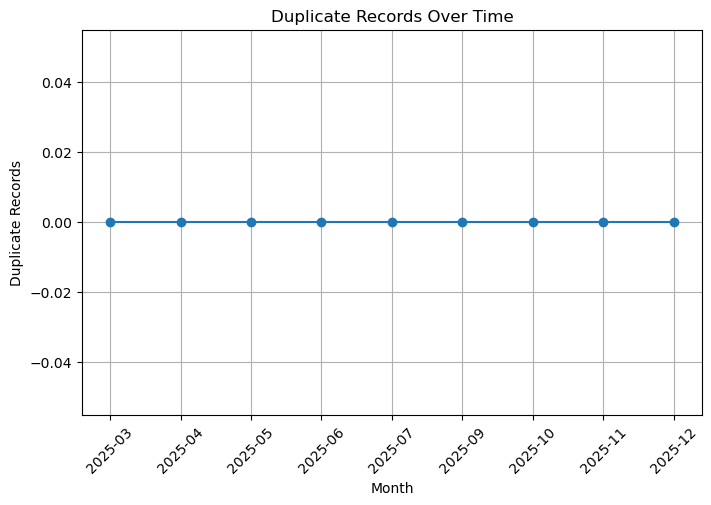

In [27]:
#Data Quality Trend (Duplicates over Time)
duplicate_trend = (
    df.assign(is_dup=df.duplicated())
      .groupby('month')['is_dup']
      .sum()
)

plt.figure(figsize=(8,5))
plt.plot(duplicate_trend.index.astype(str), duplicate_trend.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Duplicate Records")
plt.title("Duplicate Records Over Time")
plt.grid(True)
plt.show()

In [28]:
#Monthly Population Increase / Decrease (DISPLAY output)
monthly_df['pop_change'] = (
    monthly_df
    .groupby('district')['total_population']
    .diff()
)

print("\nMonthly population change (first 10 rows):")
print(
    monthly_df[['month', 'district', 'total_population', 'pop_change']]
    .head(10)
)


Monthly population change (first 10 rows):
        month    district  total_population  pop_change
0     2025-03    Adilabad              4206         NaN
749   2025-04    Adilabad              1339     -2867.0
1413  2025-07    Adilabad              1733       394.0
1665  2025-09    Adilabad              4610      2877.0
2584  2025-10    Adilabad              2324     -2286.0
3485  2025-11    Adilabad              3421      1097.0
4407  2025-12    Adilabad              2519      -902.0
1     2025-03  Agar Malwa               788         NaN
966   2025-05  Agar Malwa               709       -79.0
1201  2025-06  Agar Malwa               312      -397.0


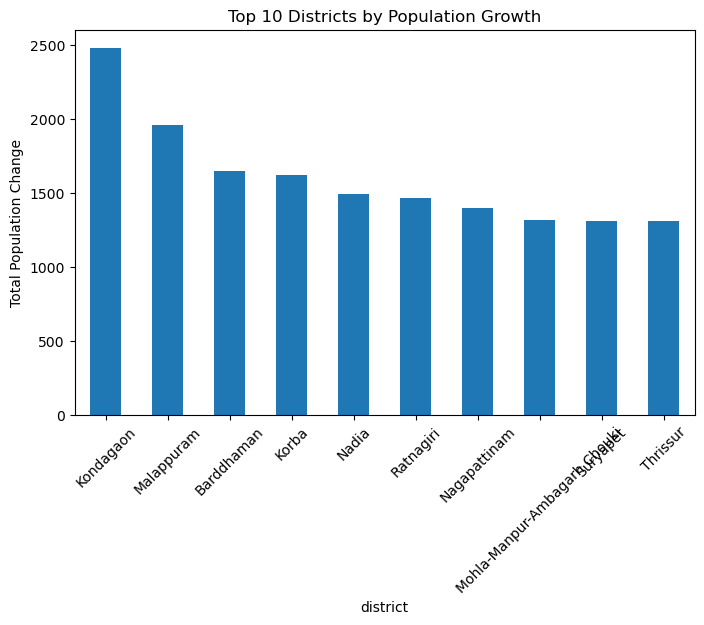

In [29]:
#Top districts by total growth
district_growth = (
    monthly_df.groupby('district')['pop_change']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
district_growth.head(10).plot(kind='bar')
plt.ylabel("Total Population Change")
plt.title("Top 10 Districts by Population Growth")
plt.xticks(rotation=45)
plt.show()

In [34]:
import matplotlib.pyplot as plt

# ---- Detect address-related demographic columns ----
address_cols = [
    col for col in monthly_df.columns
    if 'address' in col.lower()
]

print("Detected address-related columns:")
print(address_cols)

# ---- Plot address update trend if columns exist ----
if len(address_cols) > 0:
    address_trend = (
        monthly_df
        .groupby('month')[address_cols]
        .sum()
        .sum(axis=1)
    )

    plt.figure(figsize=(10,5))
    plt.plot(address_trend.index.astype(str), address_trend.values, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Address-related Demographic Updates")
    plt.title("Address Update Trend (Demographic Pattern)")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No address-related demographic columns found in this dataset.")


Detected address-related columns:
[]
⚠️ No address-related demographic columns found in this dataset.


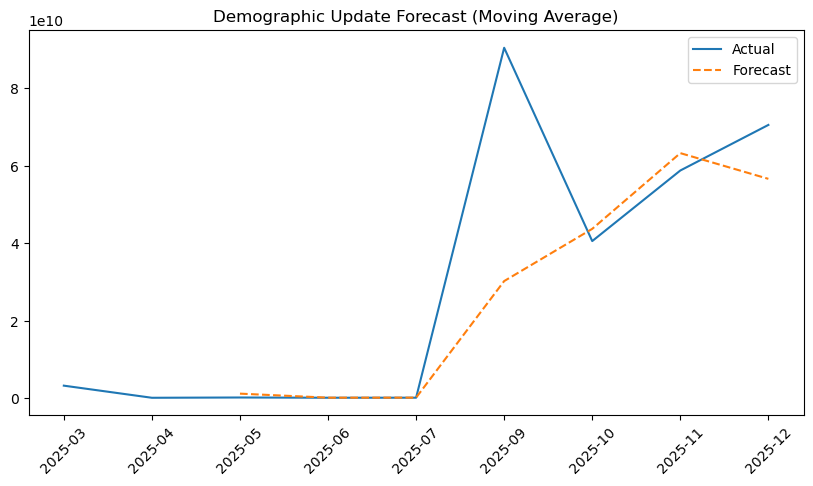

In [35]:
window = 3  # 3-month moving average

forecast = demo_trend.rolling(window=window).mean()

plt.figure(figsize=(10,5))
plt.plot(demo_trend.index.astype(str), demo_trend.values, label='Actual')
plt.plot(forecast.index.astype(str), forecast.values, linestyle='--', label='Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.title("Demographic Update Forecast (Moving Average)")
plt.show()


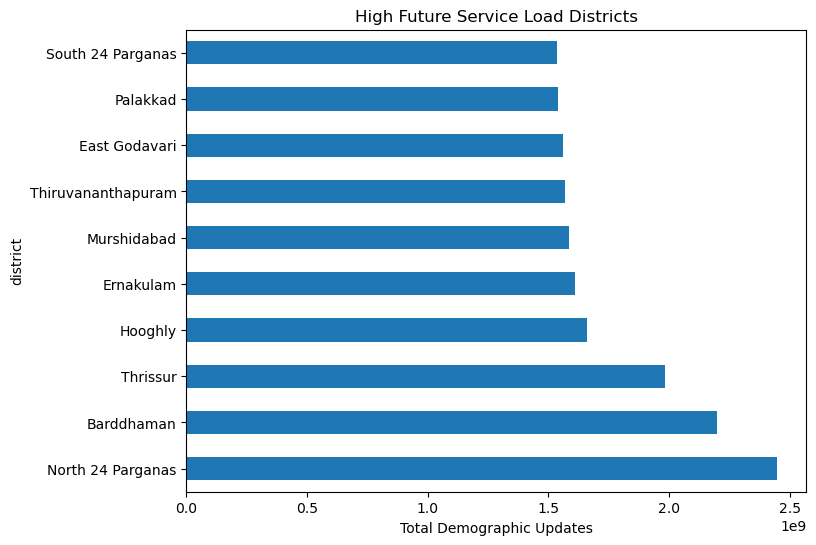

In [36]:
district_load = monthly_df.groupby('district').sum(numeric_only=True).sum(axis=1)

plt.figure(figsize=(8,6))
district_load.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Total Demographic Updates")
plt.title("High Future Service Load Districts")
plt.show()


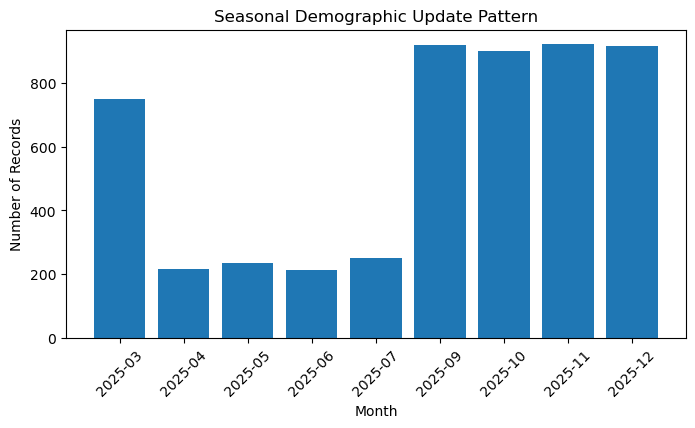

In [37]:
monthly_counts = monthly_df.groupby('month').size()

plt.figure(figsize=(8,4))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.title("Seasonal Demographic Update Pattern")
plt.show()


Demographic numeric columns used:
['pincode', 'demo_age_5_17', 'demo_age_17_', 'total_population', 'pop_change']

Sample demographic totals:
        month  district   demo_total
0     2025-03  Adilabad    9083929.0
749   2025-04  Adilabad     503812.0
1413  2025-07  Adilabad     507861.0
1665  2025-09  Adilabad  269772513.0
2584  2025-10  Adilabad  131101546.0

Anomaly threshold: 101905335358.06862

Anomalous months detected:
Series([], Freq: M, Name: demo_total, dtype: float64)


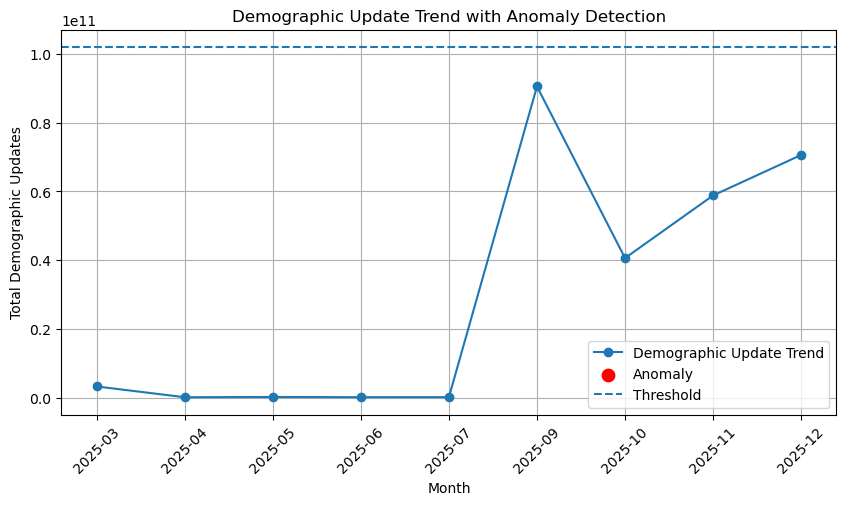

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1️⃣ Identify demographic numeric columns
# -------------------------------
demo_num_cols = monthly_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Demographic numeric columns used:")
print(demo_num_cols)

if len(demo_num_cols) == 0:
    raise ValueError("No numeric demographic columns found in monthly_df")

# -------------------------------
# 2️⃣ Row-wise demographic total (FIX for axis error)
# -------------------------------
monthly_df['demo_total'] = monthly_df[demo_num_cols].sum(axis=1)

print("\nSample demographic totals:")
print(monthly_df[['month', 'district', 'demo_total']].head())

# -------------------------------
# 3️⃣ Overall demographic trend (monthly)
# -------------------------------
overall_trend = monthly_df.groupby('month')['demo_total'].sum()

# -------------------------------
# 4️⃣ Anomaly threshold (Mean + 2*Std)
# -------------------------------
threshold = overall_trend.mean() + 2 * overall_trend.std()

print("\nAnomaly threshold:", threshold)

# -------------------------------
# 5️⃣ Detect anomaly months
# -------------------------------
anomaly_months = overall_trend[overall_trend > threshold]

print("\nAnomalous months detected:")
print(anomaly_months)

# -------------------------------
# 6️⃣ Visualization: Trend + Anomalies
# -------------------------------
plt.figure(figsize=(10,5))

plt.plot(
    overall_trend.index.astype(str),
    overall_trend.values,
    marker='o',
    label='Demographic Update Trend'
)

plt.scatter(
    anomaly_months.index.astype(str),
    anomaly_months.values,
    color='red',
    s=80,
    label='Anomaly'
)

plt.axhline(threshold, linestyle='--', label='Threshold')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Demographic Updates")
plt.title("Demographic Update Trend with Anomaly Detection")
plt.legend()
plt.grid(True)
plt.show()


Detected age-related demographic columns:
['demo_age_5_17', 'demo_age_17_']

Sample age-wise aggregated data:
         demo_age_5_17  demo_age_17_
month                               
2025-03         349583       3606171
2025-04          87064        560567
2025-05          84745        552168
2025-06          75821        568484
2025-07         106794        726269


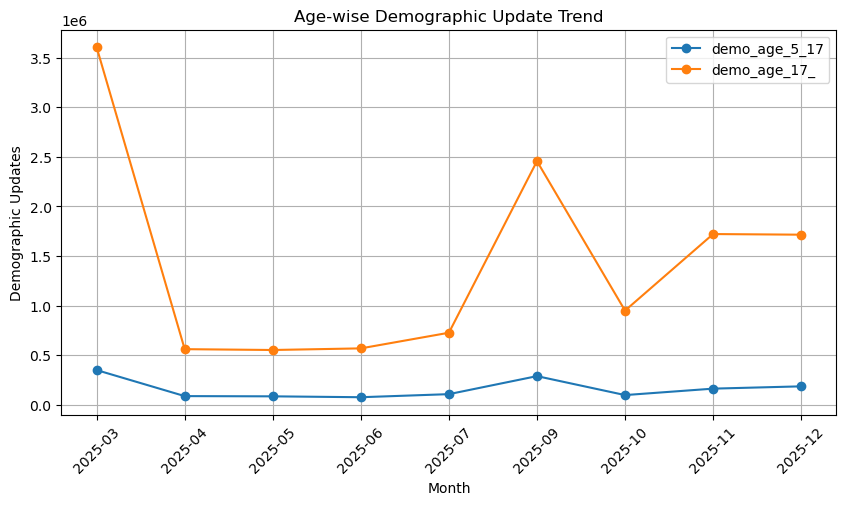

In [41]:
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Detect age-related demographic columns dynamically
# -------------------------------
age_cols = [
    col for col in monthly_df.columns
    if any(keyword in col.lower() for keyword in ['age', 'adult', 'senior', 'elder', 'youth'])
]

print("Detected age-related demographic columns:")
print(age_cols)

if len(age_cols) == 0:
    print("⚠️ No age-related demographic columns found in this dataset.")
else:
    # -------------------------------
    # 2️⃣ Aggregate age-wise demographic trend
    # -------------------------------
    age_trend = monthly_df.groupby('month')[age_cols].sum()

    print("\nSample age-wise aggregated data:")
    print(age_trend.head())

    # -------------------------------
    # 3️⃣ Visualization
    # -------------------------------
    plt.figure(figsize=(10,5))
    for col in age_trend.columns:
        plt.plot(
            age_trend.index.astype(str),
            age_trend[col],
            marker='o',
            label=col
        )

    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Demographic Updates")
    plt.title("Age-wise Demographic Update Trend")
    plt.legend()
    plt.grid(True)
    plt.show()


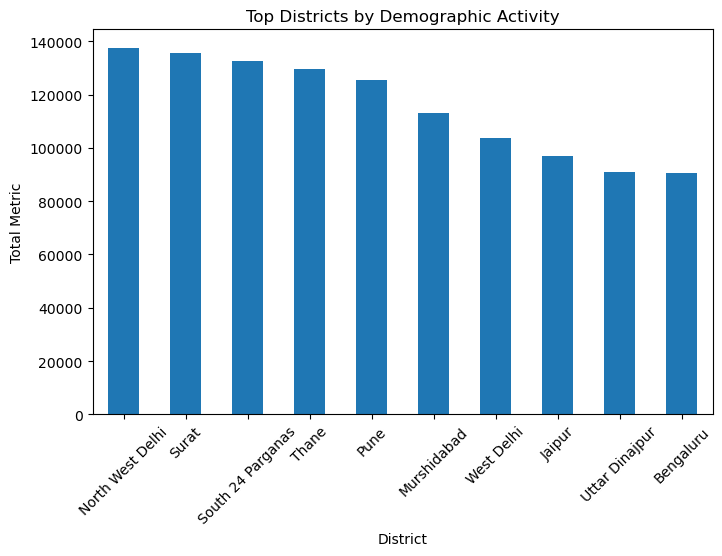

In [6]:
import matplotlib.pyplot as plt
geo_agg = (
    monthly_df.groupby('district')['total_metric']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
geo_agg.plot(kind='bar')
plt.xlabel("District")
plt.ylabel("Total Metric")
plt.title("Top Districts by Demographic Activity")
plt.xticks(rotation=45)
plt.show()


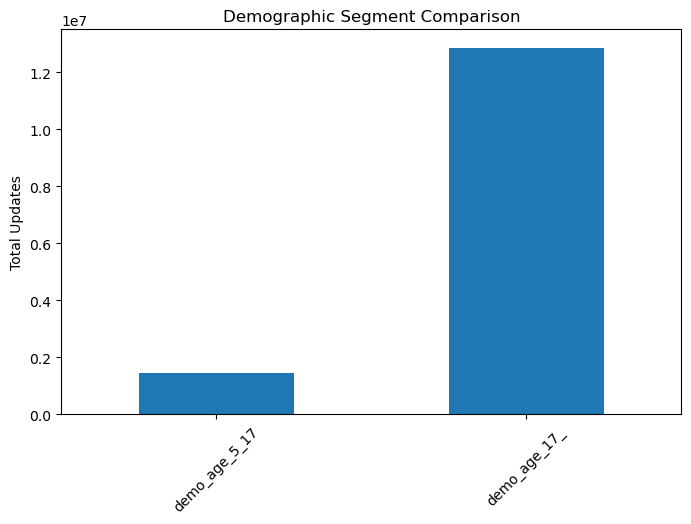

In [7]:
segment_totals = monthly_df[demo_cols].sum()

plt.figure(figsize=(8,5))
segment_totals.plot(kind='bar')
plt.ylabel("Total Updates")
plt.title("Demographic Segment Comparison")
plt.xticks(rotation=45)
plt.show()


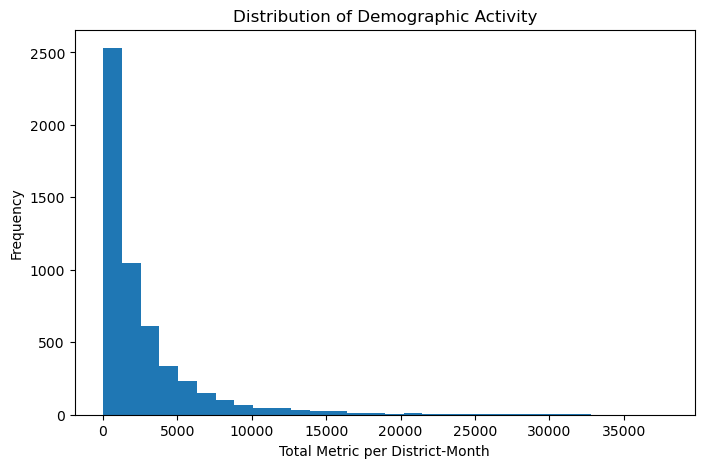

In [8]:
plt.figure(figsize=(8,5))
plt.hist(monthly_df['total_metric'], bins=30)
plt.xlabel("Total Metric per District-Month")
plt.ylabel("Frequency")
plt.title("Distribution of Demographic Activity")
plt.show()


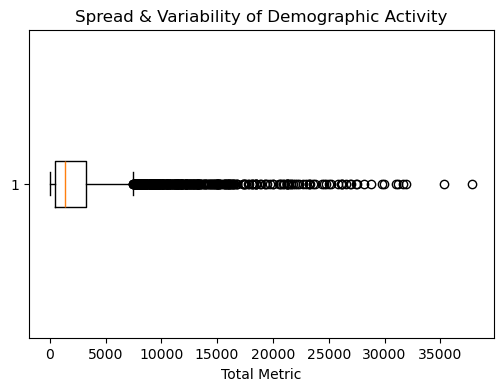

In [9]:
plt.figure(figsize=(6,4))
plt.boxplot(monthly_df['total_metric'], vert=False)
plt.xlabel("Total Metric")
plt.title("Spread & Variability of Demographic Activity")
plt.show()


In [10]:
p95 = np.percentile(monthly_df['total_metric'], 95)
p99 = np.percentile(monthly_df['total_metric'], 99)

anomalies = monthly_df[monthly_df['total_metric'] >= p99]

print("95th percentile:", p95)
print("99th percentile:", p99)
print("Number of extreme anomalies:", anomalies.shape[0])

95th percentile: 9746.3
99th percentile: 19220.939999999915
Number of extreme anomalies: 54


99th percentile threshold: 38441.87999999983
Anomalous rows: 54


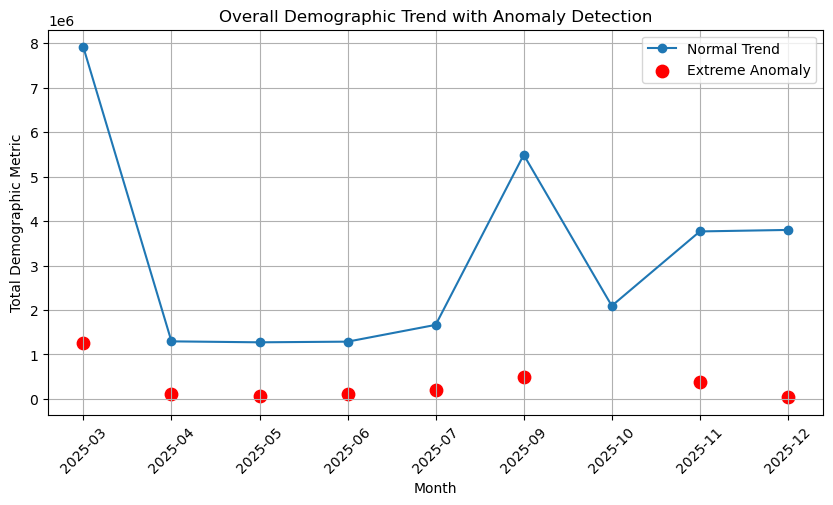

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1️⃣ Identify numeric demographic columns
# -------------------------------
exclude_cols = {'year', 'pincode'}
demo_cols = [
    col for col in monthly_df.select_dtypes(include=['int64', 'float64']).columns
    if col not in exclude_cols
]

# -------------------------------
# 2️⃣ Row-wise total metric
# -------------------------------
monthly_df['total_metric'] = monthly_df[demo_cols].sum(axis=1)

# -------------------------------
# 3️⃣ Overall trend (THIS WAS MISSING BEFORE)
# -------------------------------
overall_trend = monthly_df.groupby('month')['total_metric'].sum()

# -------------------------------
# 4️⃣ Percentile-based anomaly detection
# -------------------------------
p99 = np.percentile(monthly_df['total_metric'], 99)

anomalies = monthly_df[monthly_df['total_metric'] >= p99]

anomaly_trend = anomalies.groupby('month')['total_metric'].sum()

print("99th percentile threshold:", p99)
print("Anomalous rows:", anomalies.shape[0])

# -------------------------------
# 5️⃣ Visualization (NOW SAFE)
# -------------------------------
plt.figure(figsize=(10,5))

plt.plot(
    overall_trend.index.astype(str),
    overall_trend.values,
    marker='o',
    label='Normal Trend'
)

plt.scatter(
    anomaly_trend.index.astype(str),
    anomaly_trend.values,
    color='red',
    s=80,
    label='Extreme Anomaly'
)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Demographic Metric")
plt.title("Overall Demographic Trend with Anomaly Detection")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure month is string for plotting
df['month'] = df['month'].astype(str)

demo_cols = ['demo_age_5_17', 'demo_age_17_']
